## Sentiment Analysis of Movies Review 


## Step-1: Load the dataset

In [1]:
# load data and take a quick look
import pandas as pd
df = pd.read_csv('../input/coursework1-train/coursework1_train.csv')
df.head()

,Unnamed: 0,text,sentiment
0,0,Enjoy the opening credits. They're the best th...,neg
1,1,"Well, the Sci-Fi channel keeps churning these ...",neg
2,2,It takes guts to make a movie on Gandhi in Ind...,pos
3,3,The Nest is really just another 'nature run am...,neg
4,4,Waco: Rules of Engagement does a very good job...,pos


In [2]:
# check the size of the data and its class distribution
all_text = df['text'].tolist()
all_lables = df['sentiment'].tolist()

print('entry num', len(all_text))
print('num of pos entries', len([l for l in all_lables if l=='pos']))
print('num of neg entries', len([l for l in all_lables if l=='neg']))

entry num 40000
num of pos entries 20000
num of neg entries 20000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

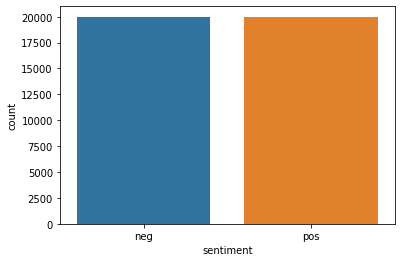

In [3]:
#EDA
import seaborn as sns
sns.countplot(x=df['sentiment'])

which means data is already balanced, otherwise we have to do balace the dataset for classification problem, however it is not necessary to do every time.(depended on which domain we are working on)

## Step-2: Data cleaning & preprocessing


In [4]:
import re
import nltk


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(0, len(df.text)):
    review = re.sub('[^a-zA-Z]', ' ', df.text[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

1.Remove unnecessary character:- Aprt from a-z & A-Z remove all other character(i.e punctuation character).

2.Convert to lowercase letters:-  To consider all word as same, convert into lower case ('Well' & 'well' consider as different word by system,So in order to solve this problem we need to convert it into lower case).

3.Tokenize,for that, here I used split funtion only.

4.Stopword, Stopwords are the words, which really does not add meaning to a sentence(i.e the, is, at, which, are, where, and on)plus it helps to reduce requeired computation power 

5.Normalization:- AS far as I know when we have large dataset mostly use stemming as it may not requier that much computation power so it will save time and cost,therefoer here I usded stemming as you know lemmatization takes time and expensive, however 
lemmatization remove inflectional endings only, which is really dictionary form of a word(more accurate).

## Step-3: Split data into train and test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text,df.sentiment, test_size = 0.20, random_state = 0)

## Step-4: TF-IDF + Logistic Regression 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 2500
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = train_vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

# train model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_vecs, y_train)

# test model
test_pred = clf.predict(test_vecs)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, test_pred)
print('Accuracy of model is '+ str(acc*100)+'%')
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))


Accuracy of model is 88.58749999999999%
              precision    recall  f1-score   support

         neg       0.89      0.88      0.88      4004
         pos       0.88      0.90      0.89      3996

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



## SAVE TRAINED MODEL


In [7]:
import pickle

# save model and other necessary modules
all_info_want_to_save = {
    'model': clf,
    'vectorizer': TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_)
}

with open("sample_trained_model.pickle","wb") as save_path:
    pickle.dump(all_info_want_to_save, save_path)